In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
!pip install datatile
from datatile.summary.df import DataFrameSummary

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submissions = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# Let's start with EDA
This Titanic challenge is just a binary classification task. My network job is to predict wheather the passenger survived or not.

### Results should be passed into csv file like this
`
PassengerId,Survived
892,0
893,1
894,0
Etc.
`

### Training data includes such information about passengers:
* Survival -> 0 = No, 1 = Yes
* pclass -> Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
* sex -> Sex	
* Age -> Age in years	
* sibsp -> # of siblings / spouses aboard the Titanic	
* parch -> # of parents / children aboard the Titanic	
* ticket -> Ticket number	
* fare -> Passenger fare	
* cabin -> Cabin number	
* embarked -> Port of Embarkation

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## We want to convert sex to numerical values since it may be useful for our model

In [6]:
# Map 'male' to 0 and 'female' to 1
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Lets visualize this data since bare numbers aren't enough

In [7]:
survival_counts = train_data['Survived'].value_counts()
fig = px.bar(x=survival_counts.index, y=survival_counts.values, title="Distribution of Survived classes in training set")
fig.show()


In [8]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np

# Check if 'PassengerId' column exists in the DataFrame
if 'PassengerId' in train_data.columns:
    # Drop 'PassengerId' column if it exists
    train_data = train_data.drop('PassengerId', axis=1)

# Select only numeric columns
numeric_cols = train_data.select_dtypes(include=[np.number]).columns

# Create a subplot for each numeric column
fig = sp.make_subplots(rows=len(numeric_cols), cols=1)

for i, col in enumerate(numeric_cols):
    fig.add_trace(go.Histogram(x=train_data[col], name=col), row=i+1, col=1)
    fig.add_annotation(dict(
        xref='paper', yref='paper',
        x=0.5, y=1 - i/len(numeric_cols),
        text=col,
        showarrow=False,
        font=dict(
            size=12,
            color="#FF0000"
        )
    ))

fig.update_layout(height=500*len(numeric_cols), width=500, title_text="Features Distribution")
fig.show()


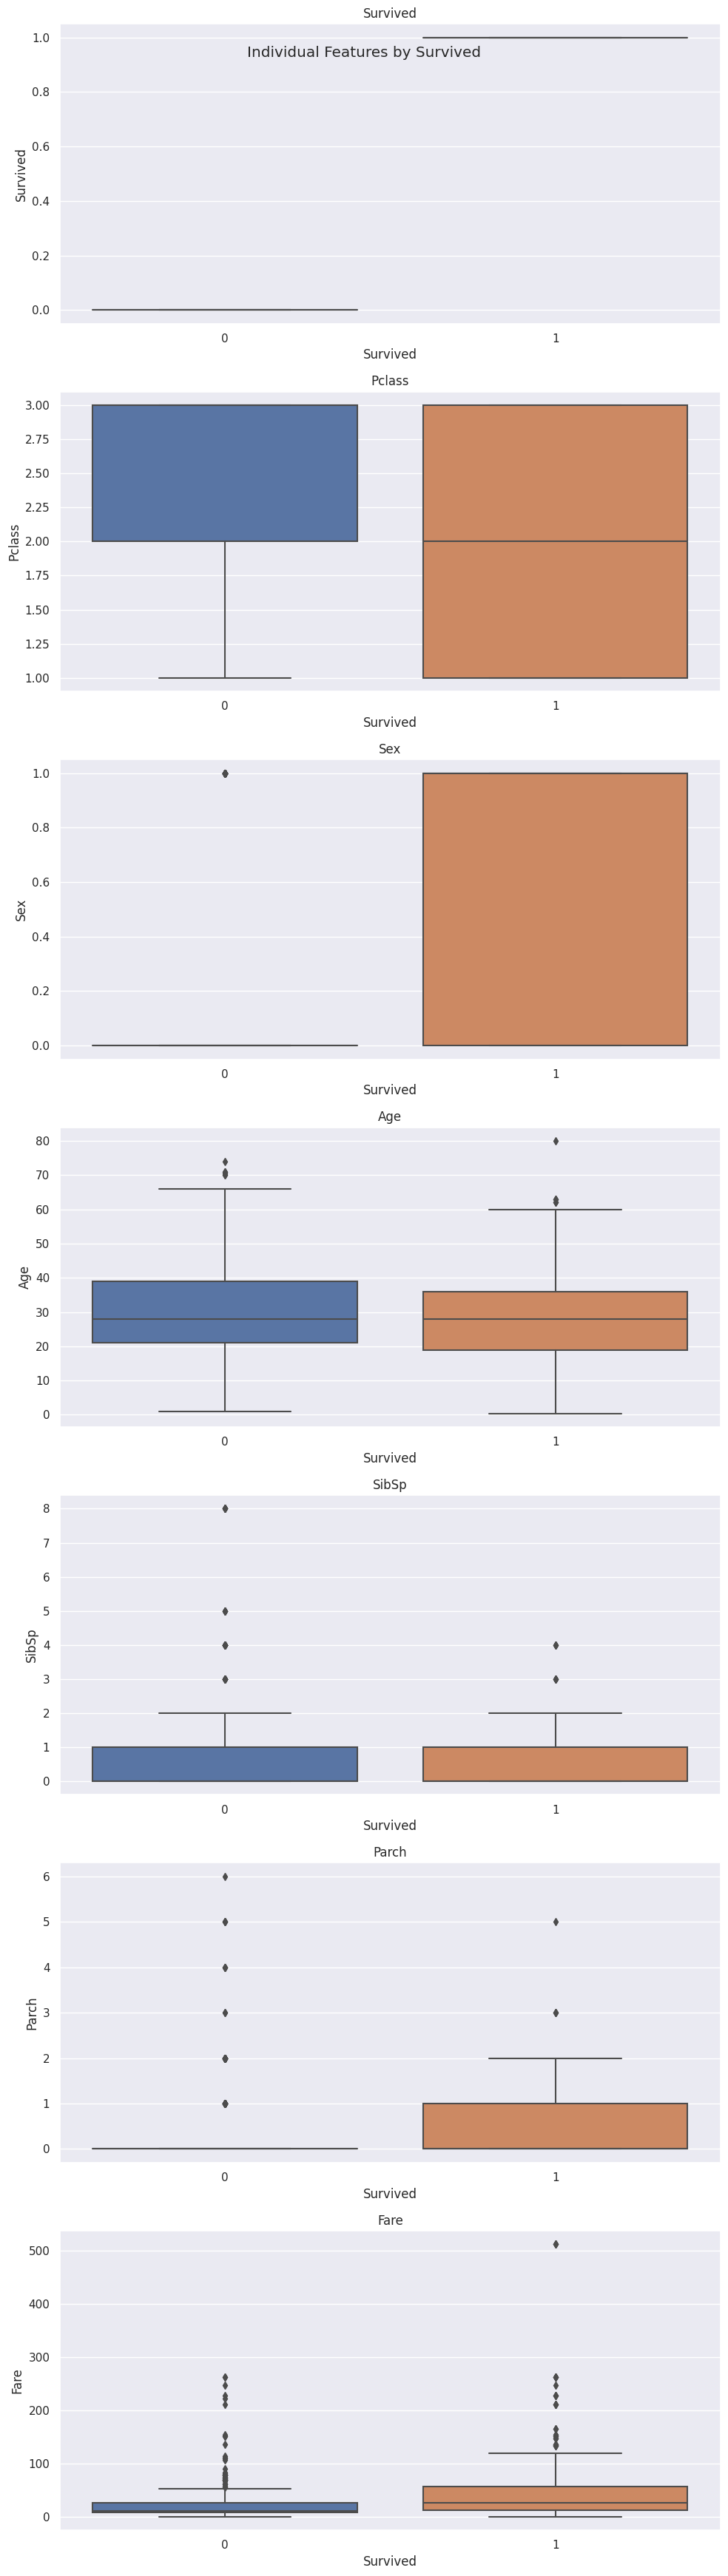

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = train_data.select_dtypes(include=[np.number]).columns

sns.set(font_scale=1)
fig, ax = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 5*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Survived", y=col, data=train_data, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.suptitle("Individual Features by Survived")
plt.show()


<Figure size 1400x1120 with 0 Axes>

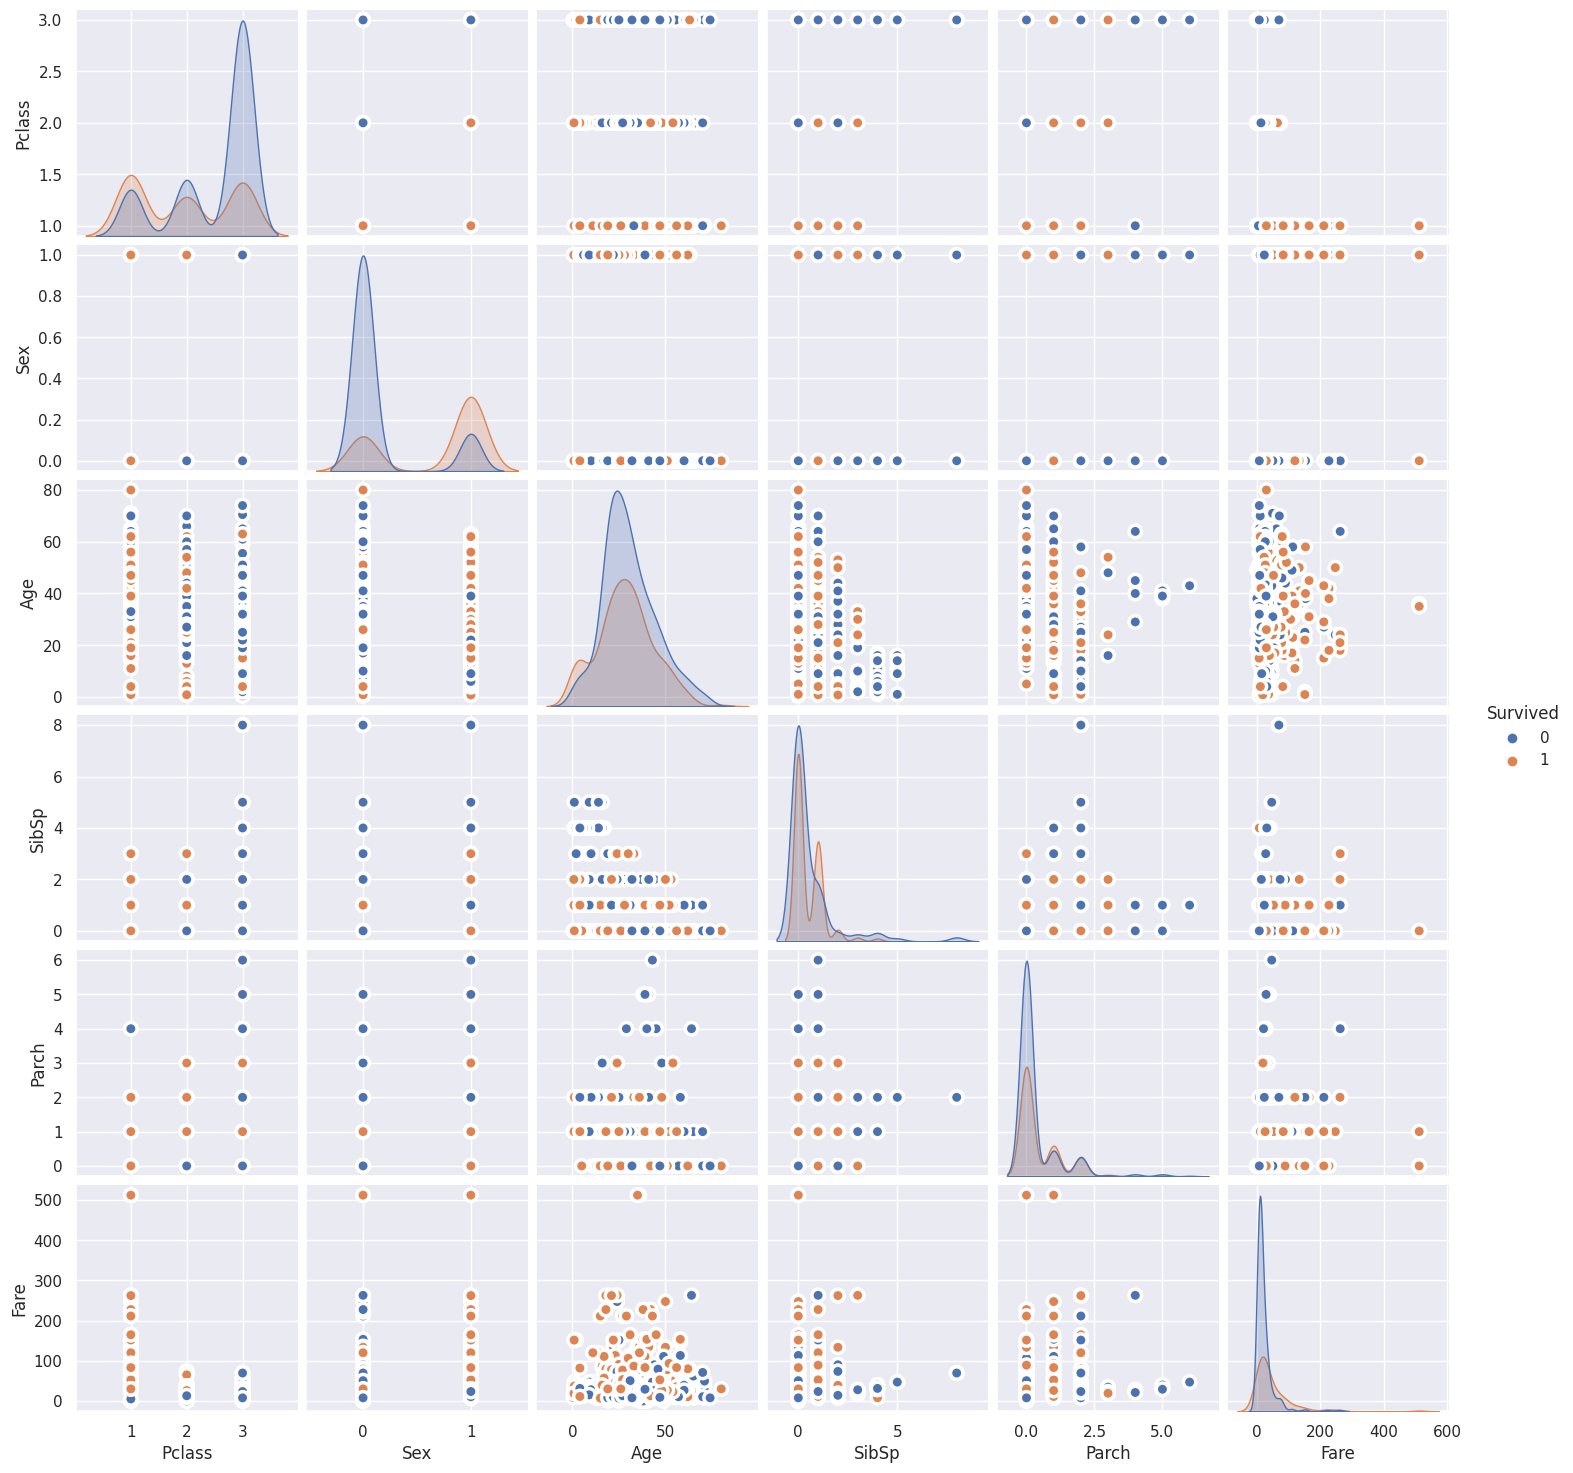

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = train_data.select_dtypes(include=[np.number])

plt.figure(figsize=(20,16), dpi= 70)
sns.pairplot(numeric_cols, kind="scatter", hue="Survived", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


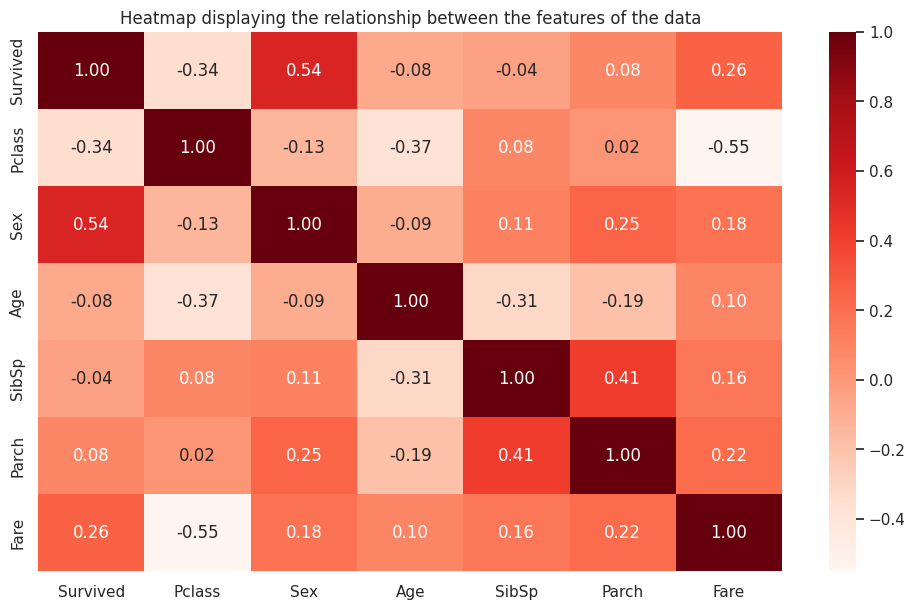

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(numeric_cols.corr(),cmap=plt.cm.Reds,annot=True,fmt='.2f')
sns.set(font_scale=1)
plt.title('Heatmap displaying the relationship between the features of the data')
plt.show()

# Now, after I gathered basic information about distribution of the data and potential correlations I'll attempt building a simple baseline model.

It seems like Sex has the biggest correlation ratio with survived. Second is SibSp, but it's over 10% lesser than Sex correlation

In [94]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
from sklearn.metrics import f1_score, accuracy_score

In [95]:
def split_data(X, y, test_size=0.3, random_state=1):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_val, y_train, y_val


In [96]:
# Drop 'Survived' column from numeric_cols
numeric_cols_no_survived = numeric_cols.drop('Survived', axis=1)

X = torch.tensor(numeric_cols_no_survived.values, dtype=torch.float32)

y = torch.tensor(numeric_cols["Survived"], dtype=torch.float32)

In [97]:
y

tensor([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 

In [98]:
numeric_cols

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [99]:
X_train, X_val, y_train, y_val = split_data(X, y)

In [100]:
device = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.005

# they will be used for measuing my pytorch NN
model_1_metrics = pd.DataFrame()
model_1_metrics['train_loss'] = []
model_1_metrics['train_acc'] = []
model_1_metrics['test_loss'] = []
model_1_metrics['test_acc'] = []
model_1_metrics['f1_score'] = []

In [103]:
def create_dataloader(X, y, shuffle=True):
    X = X.clone()
    y = y.clone()
    dataset = TensorDataset(X, y)
    
    dataloader = DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        shuffle=shuffle
    )
    print(f"DataLoader length: {len(dataloader)} | Batch Size: {BATCH_SIZE}")
    return dataloader


In [104]:
train_dataloader = create_dataloader(X_train.unsqueeze(1), y_train)
val_dataloader = create_dataloader(X_val.unsqueeze(1), y_val, False)

DataLoader length: 20 | Batch Size: 32
DataLoader length: 9 | Batch Size: 32


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

tree_classifier = DecisionTreeClassifier()

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)

tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [22]:
X_val = imputer.fit_transform(X_val)

tree_preds = tree_classifier.predict(X_val)

In [23]:
print(f'Model accuracy: ~{accuracy_score(y_val, tree_preds)*100:.2f}%')

Model accuracy: ~73.13%


In [24]:
from sklearn.metrics import confusion_matrix

tree_confusion_matrix = confusion_matrix(y_val, tree_preds)

print('Confusion matrix\n\n', tree_confusion_matrix)

Confusion matrix

 [[125  28]
 [ 44  71]]


In [25]:
def plot_confusion_matrix(preds, kernel=None, y_test=y_val, ax=None):
    confusionMatrix = confusion_matrix(y_test, preds)

    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{kernel} confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

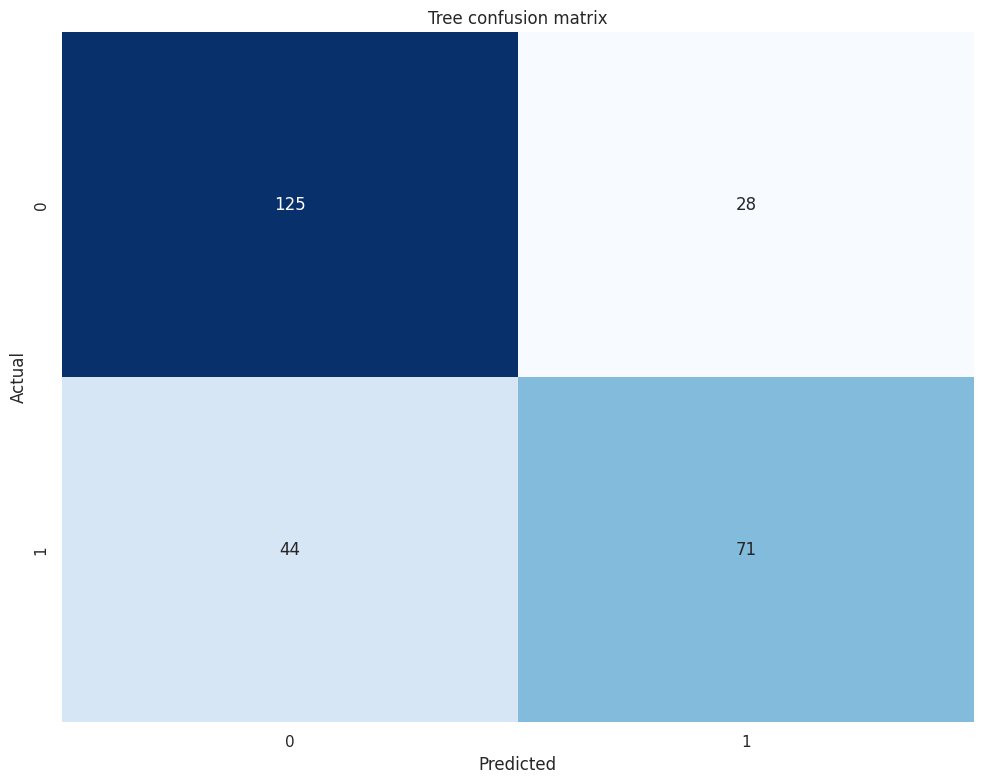

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
plot_confusion_matrix(tree_preds, ax=axes)
plt.title("Tree confusion matrix")
plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_val, tree_preds))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       153
         1.0       0.72      0.62      0.66       115

    accuracy                           0.73       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268



In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

# Support Vector Classification

In [29]:
from sklearn.svm import SVC

In [36]:
def make_svm_predictions(X_train, X_val, y_train, y_val, kernel=None, C_parameter=None):
    if kernel and C_parameter is not None:
        classifier = SVC(kernel=kernel, C=C_parameter)
    else:
        classifier = SVC()
    classifier.fit(X_train, y_train)
    classifier_preds = classifier.predict(X_val)

    print(f'{kernel} classifier accuracy score with C={C_parameter} : {accuracy_score(y_val, classifier_preds) * 100:0.2f}%')
    return classifier_preds

In [37]:
default_preds = make_svm_predictions(X_train, X_val, y_train, y_val)
rbf_preds = make_svm_predictions(X_train, X_val, y_train, y_val, "rbf", C_parameter=100.0)
polynomial_preds = make_svm_predictions(X_train, X_val, y_train, y_val, 'poly', 100.0)
sigmoid_preds = make_svm_predictions(X_train, X_val, y_train, y_val, 'sigmoid', 1.0)
linear_preds = make_svm_predictions(X_train, X_val, y_train, y_val, 'linear', 1.0)
print(linear_preds)

None classifier accuracy score with C=None : 64.93%
rbf classifier accuracy score with C=100.0 : 77.99%
poly classifier accuracy score with C=100.0 : 66.42%
sigmoid classifier accuracy score with C=1.0 : 56.34%
linear classifier accuracy score with C=1.0 : 75.37%
[1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0.

# Naive bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [47]:
def make_bayes_predictions(classifier, X_train, y_train, X_val, y_val):
    classifier = classifier    
    classifier.fit(X_train,y_train)
    classifier_preds = classifier.predict(X_val)
    classifier_preds_prob = classifier.predict_proba(X_val)
    # train_pred = classifier.predict(X_train)
    print(f'Bayes classifier accuracy score : {accuracy_score(y_val, classifier_preds) * 100:0.2f}%')
    return classifier_preds, classifier_preds_prob

In [48]:
bayes_classifier = GaussianNB()

bayes_preds, bayes_pred_prob = make_bayes_predictions(bayes_classifier, X_train, y_train, X_val, y_val)

Bayes classifier accuracy score : 76.49%


In [84]:
class TitanicModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_block_1 = nn.Sequential(
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.layer_block_1(x)

model = TitanicModel(len(numeric_cols) - 1, 11, 1)

In [85]:
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor) -> [torch.float]:
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

def count_correct_predictions(y_true: torch.Tensor, y_pred: torch.Tensor):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct

loss_fn = nn.BCEWithLogitsLoss()
# loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

In [86]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_hits, train_acc, all_y_true, all_y_pred = 0, 0, 0, [], []
    model.train()
    
    for batch in dataloader:
        X, y = batch
        X, y = X.to(device), y.to(device)
        
        logits = model(X)
        pred = torch.absround(logits)
        
        loss = loss_fn(logits, y)
        train_hits += count_correct_predictions(y, pred)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        all_y_true.extend(y)
        all_y_pred.extend(pred)
        
    total_train_acc = accuracy_fn(torch.Tensor(all_y_true), torch.Tensor(all_y_pred)) 
    return train_loss / len(data_loader.dataset), total_train_acc

In [87]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
    model.eval()
    test_loss, test_hits, all_y_true, all_y_pred = 0, 0, [], []
    
    with torch.inference_mode():
        for batch in dataloader:
            X, y = batch
            X, y = X.to(device), y.to(device)
            
            logits = model(X)
            pred = torch.round(logits)
            loss = loss_fn(logits, y)
            
            test_loss += loss.item()
            test_hits += count_correct_predictions(y, pred)
            
            all_y_true.extend(y.cpu().numpy())
            all_y_pred.extend(pred.cpu().numpy())

    f1 = f1_score(all_y_true, all_y_pred, average='macro')
    acc2 = accuracy_fn(torch.Tensor(all_y_true), torch.Tensor(all_y_pred))

    total_test_acc = test_hits / len(val_dataloader.dataset)

    return test_loss / len(data_loader.dataset), acc2, f1

In [88]:

from timeit import default_timer as timer
from tqdm.auto import tqdm

train_time_start = timer()

torch.manual_seed(42)

def train(model: torch.nn.Module,
          train_data: torch.utils.data.DataLoader,
          test_data: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          epochs: int,
          model_loss_and_acc: pd.DataFrame = None,
          device:torch.device = device):

   if model_loss_and_acc is None:
       model_loss_and_acc = pd.DataFrame(columns=['train_loss', 'train_acc', 'test_loss', 'test_acc', "f1_score"])

   for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                     dataloader=train_data,
                                     loss_fn=loss_fn,
                                     optimizer=optimizer,
                                     accuracy_fn=accuracy_fn,
                                     device=device)
        test_loss, test_acc, f1_score = test_step(model=model,
                                     dataloader=test_data,
                                     loss_fn=loss_fn,
                                     accuracy_fn=accuracy_fn,
                                     device=device)

        new_row = pd.Series({'train_loss': train_loss, 'train_acc': train_acc, 'test_loss': test_loss, 'test_acc': test_acc, "f1_score": f1_score})
        model_loss_and_acc.loc[len(model_loss_and_acc.index)] = new_row

        if epoch % 5:
            print(f"\nEpoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.5f}% | Test loss: {test_loss} | Test Acc: {test_acc:.5f}%")

   train_time_end = timer()
   print(f"\nTraining was done in {(train_time_end - train_time_start):.5f} seconds")

   return model_loss_and_acc

In [89]:
model_1_metrics = train(model=model,
      train_data=train_dataloader,
      test_data=val_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      epochs=EPOCHS,
      model_loss_and_acc=model_1_metrics)

  0%|          | 0/50 [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x6 and 890x11)